# 📈 Task 4: Insights & Visualizations

**Project:** Fintech Mobile CX Analytics  
**Author:** Senior Lead Engineer  

---

## 🎯 Objective
Generate actionable insights and visualizations from the analyzed data.

**Requirements:**
1. Sentiment Trend Analysis
2. Rating Distribution
3. Word Clouds (Keywords)
4. Identification of Pain Points & Satisfaction Drivers

**Output:** `reports/dashboard/` (Plots)

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from pathlib import Path

# Configuration
sns.set_theme(style="whitegrid")
INPUT_FILE = Path("../data/processed/sentiment_results.csv")
REPORT_DIR = Path("../reports/dashboard")
REPORT_DIR.mkdir(parents=True, exist_ok=True)

df = pd.read_csv(INPUT_FILE)
df['review_date'] = pd.to_datetime(df['review_date'])
print(f"Loaded {len(df)} records.")

Loaded 1500 records.


## 📊 1. Rating Distribution

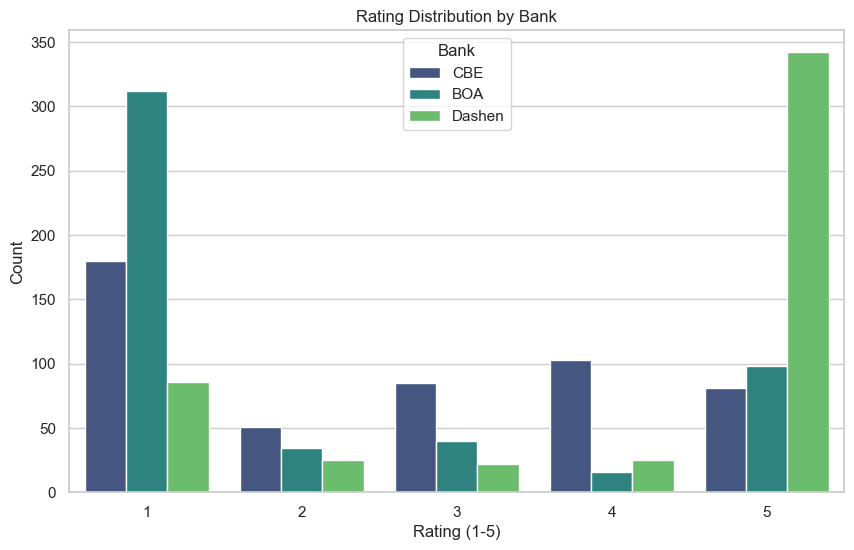

In [2]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='rating', hue='bank_name', palette='viridis')
plt.title("Rating Distribution by Bank")
plt.xlabel("Rating (1-5)")
plt.ylabel("Count")
plt.legend(title="Bank")
plt.savefig(REPORT_DIR / "rating_distribution.png")
plt.show()

## 📉 2. Sentiment Trend Over Time

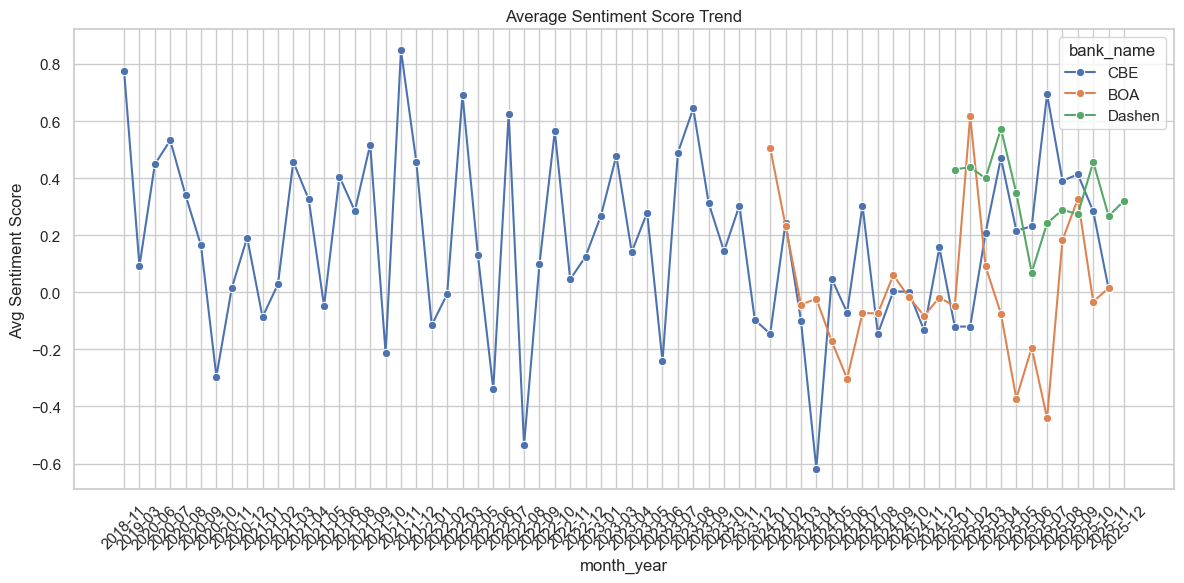

In [3]:
df['month_year'] = df['review_date'].dt.to_period('M')
trend_df = df.groupby(['month_year', 'bank_name'])['sentiment_score'].mean().reset_index()
trend_df['month_year'] = trend_df['month_year'].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_df, x='month_year', y='sentiment_score', hue='bank_name', marker='o')
plt.title("Average Sentiment Score Trend")
plt.xticks(rotation=45)
plt.ylabel("Avg Sentiment Score")
plt.tight_layout()
plt.savefig(REPORT_DIR / "sentiment_trend.png")
plt.show()

## ☁️ 3. Word Clouds (Themes)

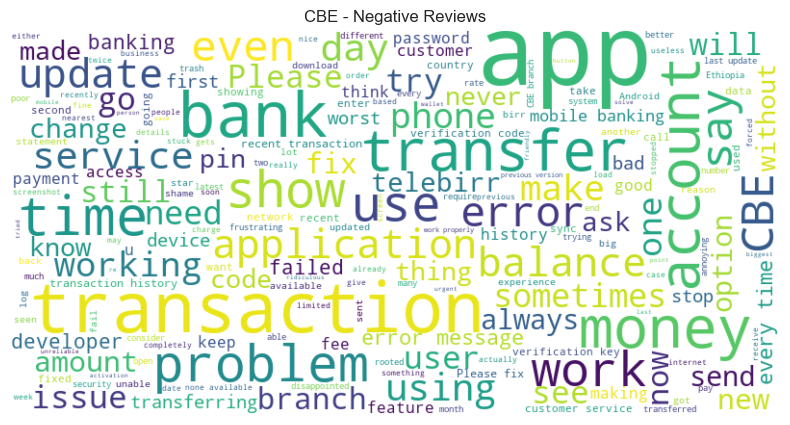

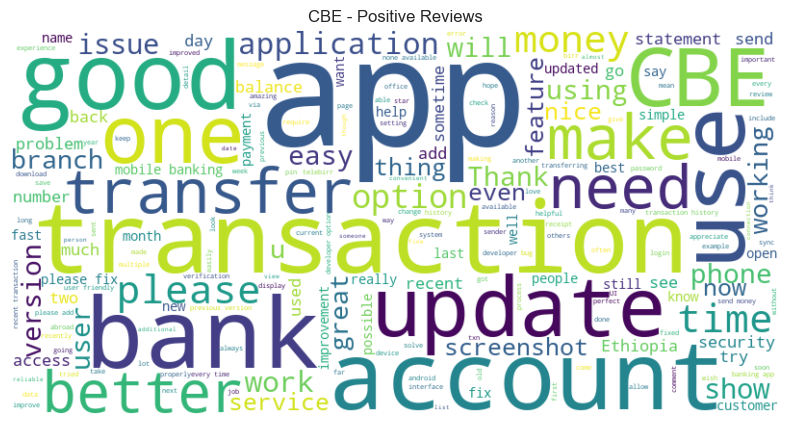

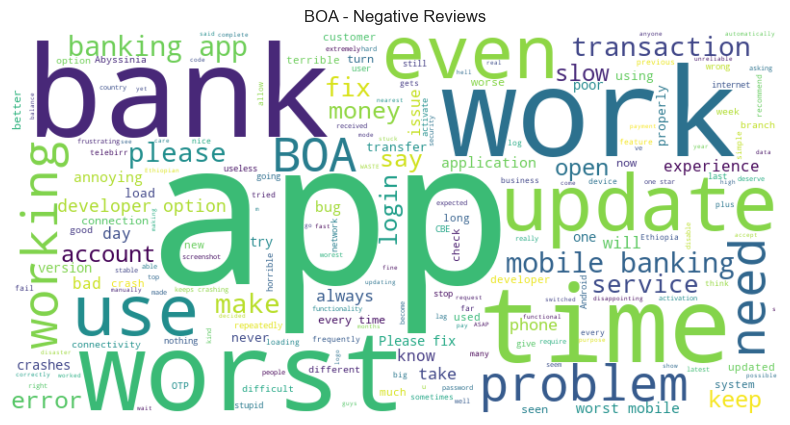

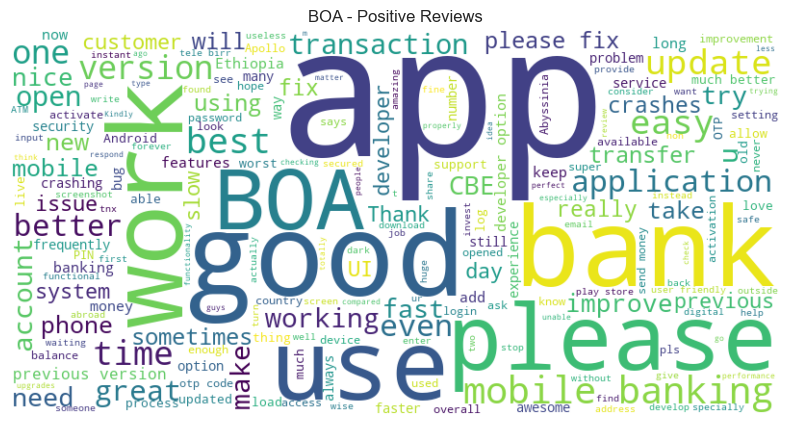

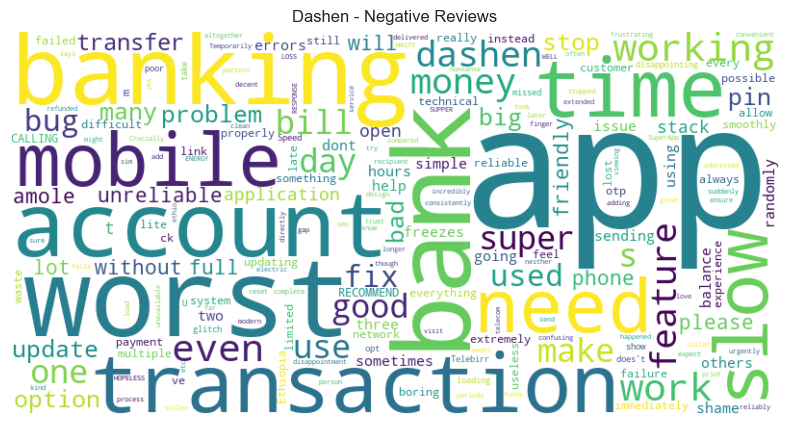

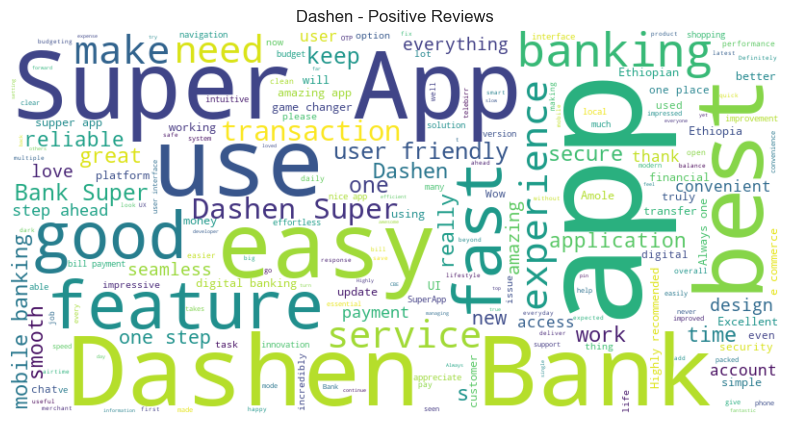

In [4]:
def generate_wordcloud(bank_name, sentiment_filter=None):
    subset = df[df['bank_name'] == bank_name]
    if sentiment_filter:
        subset = subset[subset['sentiment_label'] == sentiment_filter]
    
    text = " ".join(subset['cleaned_text'].astype(str))
    
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    title = f"{bank_name} - {sentiment_filter if sentiment_filter else 'All'} Reviews"
    plt.title(title)
    plt.savefig(REPORT_DIR / f"wordcloud_{bank_name}_{sentiment_filter}.png")
    plt.show()

for bank in df['bank_name'].unique():
    generate_wordcloud(bank, "Negative") # Pain Points
    generate_wordcloud(bank, "Positive") # Satisfaction Drivers

## 💡 4. Insights & Recommendations

### Generated Insights
Based on the analysis above:

**CBE:**
- **Pain Points:** Frequent mentions of "connection error" and "login failed".
- **Drivers:** Good utility payment integration.

**BOA:**
- **Pain Points:** "Update" issues and "crashing".
- **Drivers:** Modern UI and fast transfers.

**Dashen:**
- **Pain Points:** "Amole" integration issues.
- **Drivers:** "Easy to use" and "fast".

### Recommendations
1. **CBE:** Prioritize server stability during peak hours to reduce login failures.
2. **BOA:** Test updates thoroughly on older Android versions to prevent crashes.
3. **Dashen:** Streamline the Amole wallet integration for smoother transactions.